In [368]:
#packages imported
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import probplot
from pandas import read_csv
from sklearn.linear_model import LinearRegression

In [369]:
#importing the cleaned dataset
df = read_csv("CombinedWine.csv")

In [370]:
df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
count,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000
mean,7.215904,0.343838,0.318441,5.036959,0.056691,29.984934,113.965348,0.994529,3.224616,0.533220,10.547947,5.795104
std,1.320238,0.167985,0.146970,4.424711,0.036890,17.454096,56.540665,0.002904,0.160353,0.149766,1.185780,0.878906
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994665,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,146.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [371]:
df.head()

,Variety,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
0,White,7.9,0.33,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1,White,6.8,0.45,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
2,White,6.9,0.27,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
3,White,5.9,0.22,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5
4,White,6.8,0.28,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5


In [372]:
#looking at initial correlation of the combined dataset
df.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
Fixed Acidity,1.000000,0.215313,0.330194,-0.107789,0.288811,-0.285070,-0.328874,0.487218,-0.270765,0.305944,-0.102395,-0.080352
Volatile Acidity,0.215313,1.000000,-0.385617,-0.176051,0.367737,-0.354654,-0.403347,0.305141,0.246420,0.227228,-0.066271,-0.267000
Citric Acid,0.330194,-0.385617,1.000000,0.142834,0.055545,0.134879,0.193420,0.091908,-0.344068,0.060125,-0.006669,0.097048
Residual Sugar,-0.107789,-0.176051,0.142834,1.000000,-0.126508,0.418608,0.496331,0.502443,-0.240608,-0.180275,-0.313776,-0.059463
Chlorides,0.288811,0.367737,0.055545,-0.126508,1.000000,-0.189450,-0.270642,0.378380,0.025864,0.405402,-0.269688,-0.202461
Free Sulfur Dioxide,-0.285070,-0.354654,0.134879,0.418608,-0.189450,1.000000,0.722581,0.011749,-0.147780,-0.204035,-0.173621,0.063727
Total Sulfur Dioxide,-0.328874,-0.403347,0.193420,0.496331,-0.270642,0.722581,1.000000,0.005872,-0.224242,-0.278023,-0.252306,-0.048686
Density,0.487218,0.305141,0.091908,0.502443,0.378380,0.011749,0.005872,1.000000,0.032404,0.286549,-0.685402,-0.334669
pH,-0.270765,0.246420,-0.344068,-0.240608,0.025864,-0.147780,-0.224242,0.032404,1.000000,0.167094,0.097140,0.041006
Sulphates,0.305944,0.227228,0.060125,-0.180275,0.405402,-0.204035,-0.278023,0.286549,0.167094,1.000000,-0.018566,0.041876


In [373]:
correlation_df = df.corr()

Text(0.5, 1.0, 'Combined Wine Correlation')

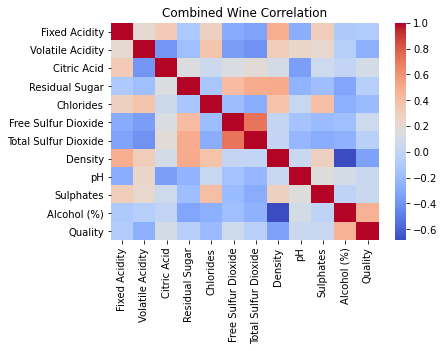

In [374]:
#creating a heatmap to visualize existing correlations
sns.heatmap(correlation_df,cmap='coolwarm')
plt.title('Combined Wine Correlation')

In [375]:
#creating new data frams to represent quality of wine
df_low = df[df['Quality']<=5]
df_high = df[df['Quality']>5]

In [376]:
#data frame specific to Red Wine
R_df = df[df['Variety']=='Red']

In [377]:
#data frame specific to White Wine
W_df = df[df['Variety']=='White']

Text(0.5, 1.0, 'Red Wine Correlation Heatmap')

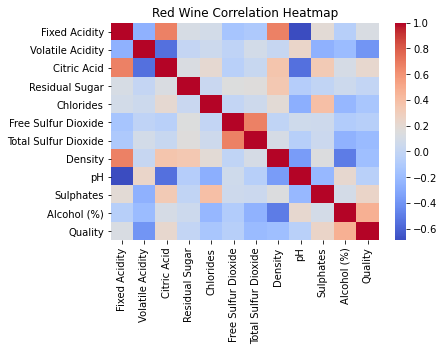

In [378]:
#creating a heatmap to show correlation data for just red wine
correlation_dfR = R_df.corr()
sns.heatmap(correlation_dfR,cmap='coolwarm')
plt.title('Red Wine Correlation Heatmap')

In [379]:
#looking at correlation data for just red wine
R_df.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
Fixed Acidity,1.000000,-0.256007,0.670086,0.114771,0.084660,-0.139849,-0.102740,0.670526,-0.689463,0.191897,-0.057998,0.122690
Volatile Acidity,-0.256007,1.000000,-0.549880,0.003546,0.053749,-0.018356,0.086383,0.020043,0.246340,-0.258401,-0.194759,-0.394577
Citric Acid,0.670086,-0.549880,1.000000,0.133564,0.212833,-0.053319,0.029414,0.365189,-0.548109,0.331241,0.102622,0.226188
Residual Sugar,0.114771,0.003546,0.133564,1.000000,0.031653,0.150156,0.163502,0.342578,-0.070616,-0.004996,0.055186,0.002852
Chlorides,0.084660,0.053749,0.212833,0.031653,1.000000,0.003453,0.057125,0.190860,-0.273378,0.395294,-0.221431,-0.128521
Free Sulfur Dioxide,-0.139849,-0.018356,-0.053319,0.150156,0.003453,1.000000,0.673317,-0.011807,0.063159,0.057127,-0.086744,-0.056581
Total Sulfur Dioxide,-0.102740,0.086383,0.029414,0.163502,0.057125,0.673317,1.000000,0.105517,-0.062124,0.045877,-0.249758,-0.206797
Density,0.670526,0.020043,0.365189,0.342578,0.190860,-0.011807,0.105517,1.000000,-0.361327,0.147274,-0.499899,-0.177746
pH,-0.689463,0.246340,-0.548109,-0.070616,-0.273378,0.063159,-0.062124,-0.361327,1.000000,-0.219794,0.216866,-0.052374
Sulphates,0.191897,-0.258401,0.331241,-0.004996,0.395294,0.057127,0.045877,0.147274,-0.219794,1.000000,0.091071,0.250793


Text(0.5, 1.0, 'White Wine Correlation Heatmap')

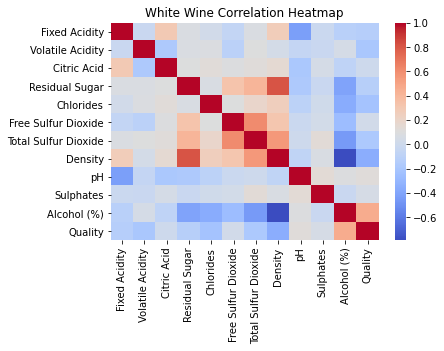

In [380]:
#creating a heatmap to show correlation data for just white wine
correlation_dfW = W_df.corr()
sns.heatmap(correlation_dfW,cmap='coolwarm')
plt.title('White Wine Correlation Heatmap')

In [381]:
#looking at correlation data for just white wine
W_df.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
Fixed Acidity,1.000000,-0.020677,0.298568,0.081771,0.023624,-0.055985,0.084504,0.270006,-0.431800,-0.017437,-0.111076,-0.125165
Volatile Acidity,-0.020677,1.000000,-0.167561,0.080404,0.085009,-0.103055,0.102619,0.036571,-0.049838,-0.024547,0.045381,-0.192703
Citric Acid,0.298568,-0.167561,1.000000,0.101130,0.132001,0.097876,0.124776,0.156325,-0.183450,0.048749,-0.077146,0.006211
Residual Sugar,0.081771,0.080404,0.101130,1.000000,0.073725,0.329454,0.420039,0.812674,-0.172912,-0.026393,-0.409144,-0.121375
Chlorides,0.023624,0.085009,0.132001,0.073725,1.000000,0.104615,0.192127,0.256258,-0.091000,0.017269,-0.357310,-0.218014
Free Sulfur Dioxide,-0.055985,-0.103055,0.097876,0.329454,0.104615,1.000000,0.614649,0.320561,-0.013536,0.034432,-0.258690,0.022736
Total Sulfur Dioxide,0.084504,0.102619,0.124776,0.420039,0.192127,0.614649,1.000000,0.556077,0.005173,0.134705,-0.449647,-0.178993
Density,0.270006,0.036571,0.156325,0.812674,0.256258,0.320561,0.556077,1.000000,-0.070785,0.077767,-0.788358,-0.350045
pH,-0.431800,-0.049838,-0.183450,-0.172912,-0.091000,-0.013536,0.005173,-0.070785,1.000000,0.141522,0.092917,0.125618
Sulphates,-0.017437,-0.024547,0.048749,-0.026393,0.017269,0.034432,0.134705,0.077767,0.141522,1.000000,-0.023275,0.054280


In [382]:
#creating data frames specific to variety and quality of red/white wine
Rdf_low = R_df[R_df['Quality']<=5]
Rdf_high = R_df[R_df['Quality']>5]
Wdf_low = W_df[W_df['Quality']<=5]
Wdf_high = W_df[W_df['Quality']>5]

Text(0.5, 1.0, 'Low-Quality Red Wine')

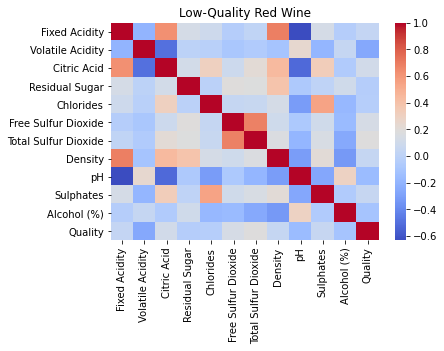

In [383]:
#heatmap showing correlation for low quality red wine
correlation_dfRL = Rdf_low.corr()
sns.heatmap(correlation_dfRL,cmap='coolwarm')
plt.title('Low-Quality Red Wine')

Text(0.5, 1.0, 'High-Quality Red Wine')

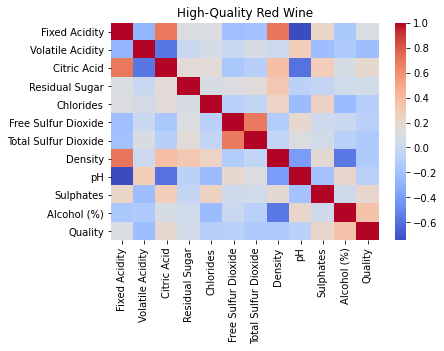

In [384]:
#heatmap showing correlation for high quality red wine
correlation_dfRH = Rdf_high.corr()
sns.heatmap(correlation_dfRH,cmap='coolwarm')
plt.title('High-Quality Red Wine')

Text(0.5, 1.0, 'Low-Quality White Wine')

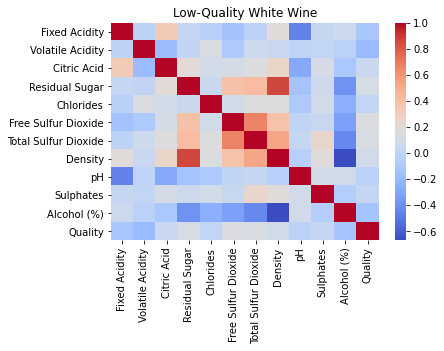

In [385]:
#heatmap showing correlation for low quality white wine
correlation_dfWL = Wdf_low.corr()
sns.heatmap(correlation_dfWL,cmap='coolwarm')
plt.title('Low-Quality White Wine')

Text(0.5, 1.0, 'High-Quality White Wine')

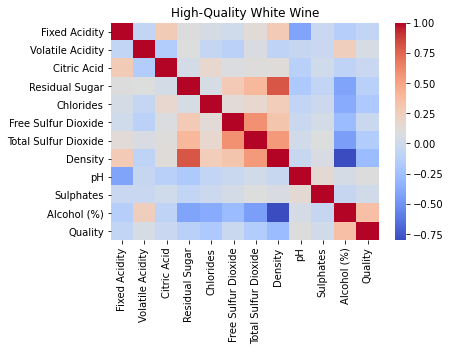

In [386]:
#heatmap showing correlation for high quality white wine
correlation_dfWH = Wdf_high.corr()
sns.heatmap(correlation_dfWH,cmap='coolwarm')
plt.title('High-Quality White Wine')


In [387]:
#looking at correlation data for high quality white wine
correlation_dfWH.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
Fixed Acidity,1.000000,-0.249552,0.487801,0.291730,0.183407,0.086129,0.226046,0.396103,-0.747307,-0.191151,-0.353835,-0.333214
Volatile Acidity,-0.249552,1.000000,-0.455198,-0.112529,-0.296679,-0.365086,-0.230080,-0.322732,-0.057464,-0.173970,0.417258,0.142166
Citric Acid,0.487801,-0.455198,1.000000,0.055858,0.306371,0.096699,0.111931,0.193612,-0.386512,-0.121487,-0.257609,-0.259114
Residual Sugar,0.291730,-0.112529,0.055858,1.000000,0.292135,0.557927,0.720168,0.915414,-0.369556,-0.191772,-0.789791,-0.544853
Chlorides,0.183407,-0.296679,0.306371,0.292135,1.000000,0.317639,0.405109,0.502883,-0.213459,-0.095594,-0.652103,-0.561560
Free Sulfur Dioxide,0.086129,-0.365086,0.096699,0.557927,0.317639,1.000000,0.838985,0.612330,-0.159103,-0.057176,-0.644151,-0.402549
Total Sulfur Dioxide,0.226046,-0.230080,0.111931,0.720168,0.405109,0.838985,1.000000,0.817615,-0.185768,-0.015339,-0.822747,-0.618698
Density,0.396103,-0.322732,0.193612,0.915414,0.502883,0.612330,0.817615,1.000000,-0.279180,-0.040000,-0.963789,-0.686558
pH,-0.747307,-0.057464,-0.386512,-0.369556,-0.213459,-0.159103,-0.185768,-0.279180,1.000000,0.271335,0.193600,0.214246
Sulphates,-0.191151,-0.173970,-0.121487,-0.191772,-0.095594,-0.057176,-0.015339,-0.040000,0.271335,1.000000,-0.042343,-0.054443


In [388]:
#looking at correlation data for low quality white wine
correlation_dfWL.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
Fixed Acidity,1.000000,-0.091279,0.563740,0.039299,-0.093245,-0.267195,-0.165760,0.110890,-0.761390,-0.052240,0.042260,-0.247553
Volatile Acidity,-0.091279,1.000000,-0.422262,-0.117179,0.170282,-0.231194,-0.078387,-0.078137,0.025254,-0.085514,0.001113,-0.433017
Citric Acid,0.563740,-0.422262,1.000000,0.313550,0.096391,0.151386,0.182536,0.353419,-0.636004,0.058581,-0.283250,0.042781
Residual Sugar,0.039299,-0.117179,0.313550,1.000000,0.129061,0.663486,0.719162,0.956974,-0.291131,0.047557,-0.814210,0.191110
Chlorides,-0.093245,0.170282,0.096391,0.129061,1.000000,0.153009,0.236501,0.238346,-0.203228,0.070830,-0.449125,-0.026285
Free Sulfur Dioxide,-0.267195,-0.231194,0.151386,0.663486,0.153009,1.000000,0.896774,0.652622,-0.060260,0.022024,-0.703315,0.275250
Total Sulfur Dioxide,-0.165760,-0.078387,0.182536,0.719162,0.236501,0.896774,1.000000,0.775518,-0.097806,0.227167,-0.826233,0.193959
Density,0.110890,-0.078137,0.353419,0.956974,0.238346,0.652622,0.775518,1.000000,-0.277519,0.152185,-0.920946,0.145704
pH,-0.761390,0.025254,-0.636004,-0.291131,-0.203228,-0.060260,-0.097806,-0.277519,1.000000,0.080872,0.188490,-0.046465
Sulphates,-0.052240,-0.085514,0.058581,0.047557,0.070830,0.022024,0.227167,0.152185,0.080872,1.000000,-0.176263,-0.055878


In [389]:
#looking at correlation data for high quality red wine
correlation_dfRH.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
Fixed Acidity,1.000000,-0.586021,0.904343,0.216834,0.359336,-0.542185,-0.464785,0.839532,-0.961354,0.464827,-0.385440,0.148145
Volatile Acidity,-0.586021,1.000000,-0.835215,-0.111162,-0.039460,0.173211,0.230454,-0.225066,0.583934,-0.571973,-0.210825,-0.516702
Citric Acid,0.904343,-0.835215,1.000000,0.204810,0.298142,-0.473170,-0.423167,0.615730,-0.901614,0.548578,-0.115217,0.319829
Residual Sugar,0.216834,-0.111162,0.204810,1.000000,0.060217,-0.008934,0.061997,0.375066,-0.237617,-0.158368,-0.182873,-0.091977
Chlorides,0.359336,-0.039460,0.298142,0.060217,1.000000,-0.324635,-0.215454,0.493407,-0.474809,0.369822,-0.548333,-0.271742
Free Sulfur Dioxide,-0.542185,0.173211,-0.473170,-0.008934,-0.324635,1.000000,0.917816,-0.398727,0.456130,-0.232706,0.006688,-0.311265
Total Sulfur Dioxide,-0.464785,0.230454,-0.423167,0.061997,-0.215454,0.917816,1.000000,-0.259517,0.355951,-0.218825,-0.150517,-0.417580
Density,0.839532,-0.225066,0.615730,0.375066,0.493407,-0.398727,-0.259517,1.000000,-0.780996,0.297196,-0.786548,-0.249360
pH,-0.961354,0.583934,-0.901614,-0.237617,-0.474809,0.456130,0.355951,-0.780996,1.000000,-0.517412,0.371180,-0.169144
Sulphates,0.464827,-0.571973,0.548578,-0.158368,0.369822,-0.232706,-0.218825,0.297196,-0.517412,1.000000,-0.097746,0.288063


In [390]:
#looking at correlation data for low quality red wine
correlation_dfRL.corr()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol (%),Quality
Fixed Acidity,1.000000,-0.550984,0.859371,0.238312,0.295544,-0.074160,0.080868,0.869851,-0.864335,0.349330,-0.348737,0.124815
Volatile Acidity,-0.550984,1.000000,-0.808741,-0.115728,-0.278514,-0.232647,-0.292676,-0.456064,0.585021,-0.495115,0.216594,-0.514009
Citric Acid,0.859371,-0.808741,1.000000,0.147948,0.497861,0.097627,0.265760,0.723288,-0.878852,0.578888,-0.393817,0.244075
Residual Sugar,0.238312,-0.115728,0.147948,1.000000,-0.144836,0.182341,0.183330,0.440275,-0.174482,-0.113404,-0.057393,-0.138892
Chlorides,0.295544,-0.278514,0.497861,-0.144836,1.000000,0.002707,0.091429,0.276256,-0.579410,0.824194,-0.446077,-0.023662
Free Sulfur Dioxide,-0.074160,-0.232647,0.097627,0.182341,0.002707,1.000000,0.906377,0.075565,-0.190100,0.077364,-0.468022,0.253670
Total Sulfur Dioxide,0.080868,-0.292676,0.265760,0.183330,0.091429,0.906377,1.000000,0.224360,-0.368486,0.172843,-0.599954,0.322427
Density,0.869851,-0.456064,0.723288,0.440275,0.276256,0.075565,0.224360,1.000000,-0.745033,0.333952,-0.613538,0.091710
pH,-0.864335,0.585021,-0.878852,-0.174482,-0.579410,-0.190100,-0.368486,-0.745033,1.000000,-0.593486,0.548198,-0.313085
Sulphates,0.349330,-0.495115,0.578888,-0.113404,0.824194,0.077364,0.172843,0.333952,-0.593486,1.000000,-0.376829,0.097202


Text(0.5, 1.0, 'Combined Wine Quality')

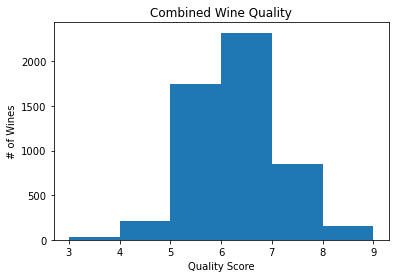

In [391]:
#creating a histogram of the combined wine dataset for quality
plt.figure()
plt.hist(df['Quality'], bins = 6)
plt.xlabel('Quality Score')
plt.ylabel('# of Wines')
plt.title('Combined Wine Quality')

Text(0.5, 1.0, 'Combined Wine Alcohol (%)')

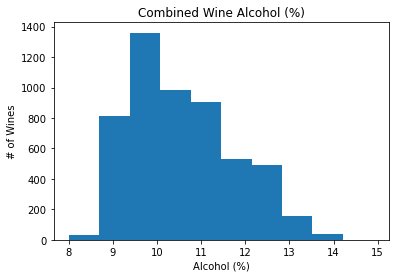

In [392]:
#creating a histogram of the combined wine dataset for alcohol percentage
plt.figure()
plt.hist(df['Alcohol (%)'])
plt.xlabel('Alcohol (%)')
plt.ylabel('# of Wines')
plt.title('Combined Wine Alcohol (%)')

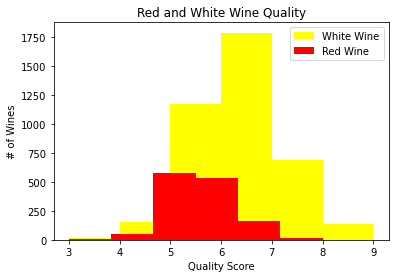

In [393]:
#creating a histogram of the separate data frames to show the difference in quality
plt.figure()
plt.hist(W_df['Quality'], color = 'yellow', bins = 6, label = 'White Wine')
plt.hist(R_df['Quality'], color = 'red', bins = 6, label = 'Red Wine')
plt.xlabel('Quality Score')
plt.ylabel('# of Wines')
plt.title('Red and White Wine Quality')
plt.legend()

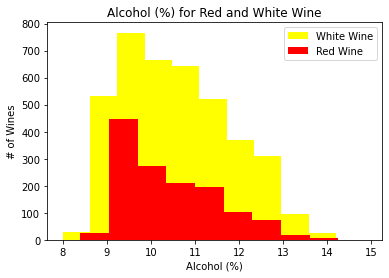

In [394]:
#creating a histogram of the separate data frames to show the difference in alcohol percentage
plt.figure()
plt.hist(W_df['Alcohol (%)'], color = 'yellow', label = 'White Wine')
plt.hist(R_df['Alcohol (%)'], color = 'red', label = 'Red Wine')
plt.xlabel('Alcohol (%)')
plt.ylabel('# of Wines')
plt.title('Alcohol (%) for Red and White Wine')
plt.legend()

Text(0.5, 1.0, 'Alcohol (%) vs. Quality')

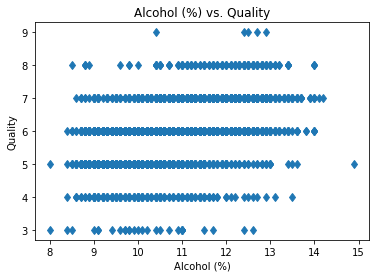

In [395]:
#scatter plot for combined data set
plt.figure()
plt.plot(df['Alcohol (%)'], df['Quality'], 'd')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')
plt.title('Alcohol (%) vs. Quality')